In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Carrega o dataset
pasta = '../datasets/'
dataset = 'arrecadacao_uf.csv'

df_uf = pd.read_csv(pasta + dataset, parse_dates=True, index_col='data')
df_uf

,estado,arrecadacao
data,,
2004-01-01,AC,8.54
2004-01-01,AL,46.65
2004-01-01,AP,10.38
2004-01-01,AM,236.11
2004-01-01,BA,407.40
...,...,...
2019-12-01,RS,3608.63
2019-12-01,SC,3580.42
2019-12-01,SE,174.02


In [3]:
# Verifica o tipo das colunas, do índice e ocorrência de NaN
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5184 entries, 2004-01-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   estado       5184 non-null   object 
 1   arrecadacao  5184 non-null   float64
dtypes: float64(1), object(1)
memory usage: 121.5+ KB


In [4]:
# Agrega os valores por mês para explorar os dados do Brasil
df = df_uf.groupby(['data']).sum()

In [5]:
# Define alguns parâmetros para padronizar os gráficos
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['lines.linewidth'] = 2

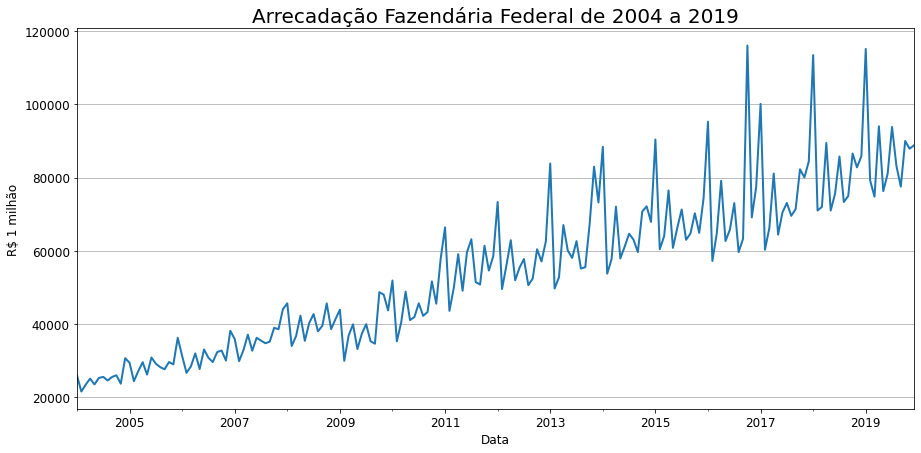

In [6]:
# Gráfico da arrecadação ao longo do tempo
fig, ax = plt.subplots()
df['arrecadacao'].plot()
ax.set_xlabel('Data')
ax.set_ylabel('R$ 1 milhão')
ax.set_title('Arrecadação Fazendária Federal de 2004 a 2019')
ax.grid(True, axis='y')
plt.show();

In [7]:
# Agrupa a média da arrecadação por estados
arrec_estados = df_uf.groupby('estado')['arrecadacao'].mean().sort_values()
arrec_estados.sum()

54678.24685678161

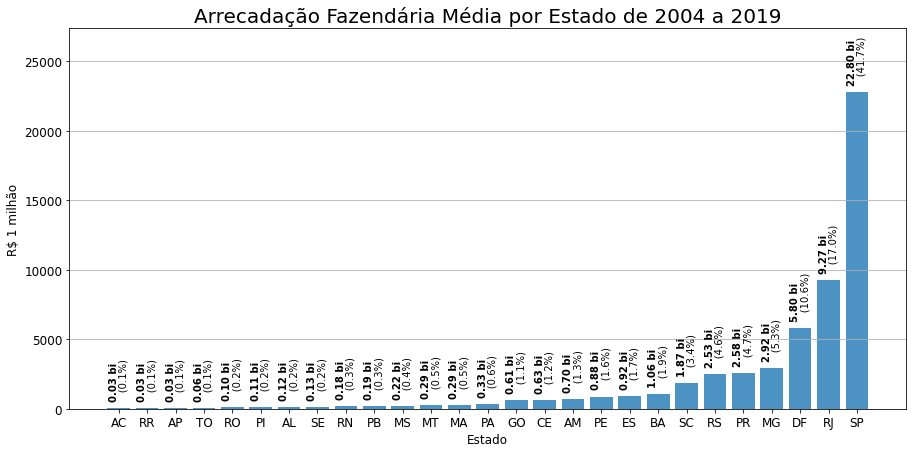

In [8]:
# Gráfico da arrecadação por estado
fig, ax = plt.subplots()
x = arrec_estados.index
y = arrec_estados.values
total = y.sum()
plt.bar(x, y, alpha=0.8)   
ax.set_xlabel('Estado')
ax.set_ylabel('R$ 1 milhão')
ax.set_ylim(top=y[-1]*1.2)
ax.set_title('Arrecadação Fazendária Média por Estado de 2004 a 2019')
ax.grid(True, axis='y')

# Acrescenta os valores de cada barra
for i, v in enumerate(y):
        plt.text(i, v, f'  {v/1e3:.2f} bi', color='black', rotation = 'vertical',  fontweight = 'bold', ha='right', va='bottom')
        plt.text(i, v, f'      ({v/total*100:.1f}%)', color='black', rotation = 'vertical',  fontweight = 'medium', ha='left')

plt.show();

In [9]:
# Cria dicionário relaciona os estados às regiões correspondentes
regioes = {
        'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte', 
        'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste',
        'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste', 
        'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 
        'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste', 
        'PR': 'Sul', 'RS': 'Sul','SC': 'Sul'}

In [10]:
# Cria df com a região do Brasil
df_uf['regiao'] = df_uf['estado'].map(regioes)
df_regiao = df_uf[['regiao', 'arrecadacao']].groupby(['data','regiao']).sum()
df_regiao.head(10)

arrecadacao
data       regiao                   
2004-01-01 Centro-Oeste      2940.06
           Nordeste          1229.29
           Norte              449.95
           Sudeste          18328.37
           Sul               2979.34
2004-02-01 Centro-Oeste      2402.17
           Nordeste           995.28
           Norte              397.98
           Sudeste          15430.24
           Sul               2293.39

In [11]:
# Agrupa a média da arrecadação por regiões
arrec_regiao = df_regiao.groupby('regiao')['arrecadacao'].mean().sort_values(ascending=False)
arrec_regiao.sum()

54678.246856781625

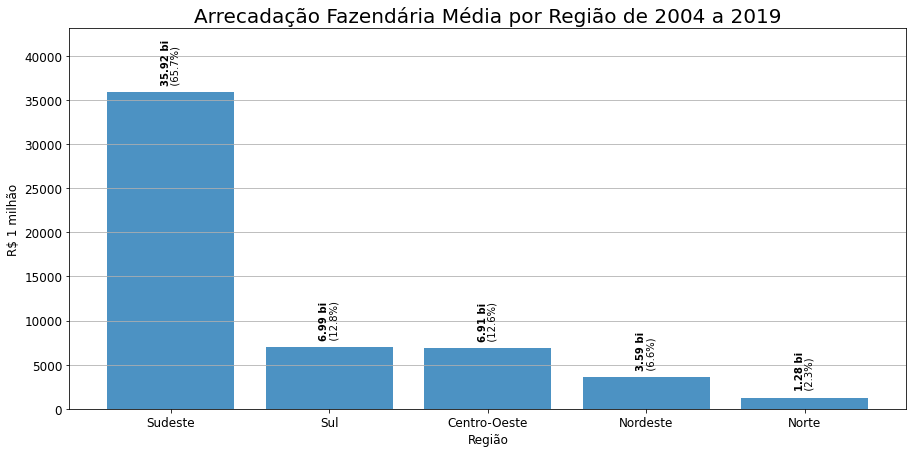

In [12]:
# Gráfico da arrecadação por região
fig, ax = plt.subplots()
x = arrec_regiao.index
y = arrec_regiao.values
total = y.sum()
plt.bar(x, y, alpha=0.8)   
ax.set_xlabel('Região')
ax.set_ylabel('R$ 1 milhão')
ax.set_ylim(top=y[0]*1.2)
ax.set_title('Arrecadação Fazendária Média por Região de 2004 a 2019')
ax.grid(True, axis='y')

# Acrescenta os valores de cada barra
for i, v in enumerate(y):
        plt.text(i, v, f'  {v/1e3:.2f} bi', color='black', rotation = 'vertical',  fontweight = 'bold', ha='right', va='bottom')
        plt.text(i, v, f'   ({v/total*100:.1f}%)', color='black', rotation = 'vertical',  fontweight = 'medium', ha='left')

plt.show();

## Decomposição STL e Tratamento de Outliers

In [13]:
# Totaliza a arrecadação dos estados por mês
df = df_uf.groupby('data').sum()

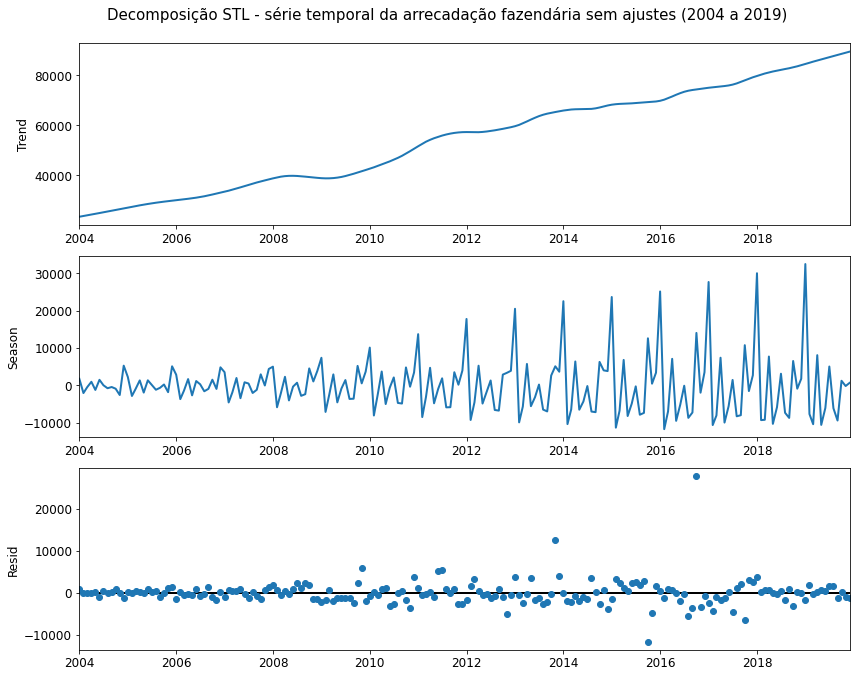

In [14]:
# Decomposição da série em tendência, sazonalidade e resíduos
from statsmodels.tsa.seasonal import STL

stl = STL(df['arrecadacao'])
plt.rcParams['figure.figsize'] = (12, 9)

res = stl.fit()

fig = res.plot(observed = False)
fig.suptitle('        Decomposição STL - série temporal da arrecadação fazendária sem ajustes (2004 a 2019)', fontsize=15, y=1.04);

In [15]:
# Exporta o dataset para ser importado no R Script "06.1. Detecção de Outliers com R - forecast - tsoutliers.R"
df.to_csv(pasta+'arrecadacao_Brasil.csv')

In [16]:
# Índices dos outliers detectados pelo tsoutliers no R
lista = [1, 13, 25, 37, 119, 154, 169, 181]
# Os índices no Python começam em zero e no R em 1, necessário subtrair 1 dos índices
lista = [x-1 for x in lista]
df.iloc[lista][['arrecadacao']]

,arrecadacao
data,
2004-01-01,25927.01
2005-01-01,29382.55
2006-01-01,31256.47
2007-01-01,35858.85
2013-11-01,82983.56
2016-10-01,116084.25
2018-01-01,113487.90
2019-01-01,115156.06


In [17]:
# Índices dos outliers detectados pelo tsoutliers no R utilizando a transformação Box-Cox
lista = [12, 18, 24, 25, 37, 62, 71, 119, 154]
# Os índices no Python começam em zero e no R em 1, necessário subtrair 1 dos índices
lista = [x-1 for x in lista]
df.iloc[lista][['arrecadacao']]

,arrecadacao
data,
2004-12-01,30632.51
2005-06-01,30823.35
2005-12-01,36212.19
2006-01-01,31256.47
2007-01-01,35858.85
2009-02-01,29907.37
2009-11-01,48006.71
2013-11-01,82983.56
2016-10-01,116084.25


In [18]:
df.loc[['2013-11-01', '2016-10-01']]

,arrecadacao
data,
2013-11-01,82983.56
2016-10-01,116084.25


Observa-se nos resíduos da decomposição um pico muito elevado em outubro-2016.

Segundo o relatório de análise da arrecadação mensal RFB:
https://receita.economia.gov.br/dados/receitadata/arrecadacao/relatorios-do-resultado-da-arrecadacao/arrecadacao-2016/outubro2016/analise-mensal-out16.pdf

O desempenho da arrecadação, tanto no mês de outubro quanto no período acumulado, foi bastante influenciada pelo regime especial de regularização cambial e tributária – RERCT. 

Nota-se que o pico na primeira diferença é praticamente o valor recolhido no âmbito do RERCT.

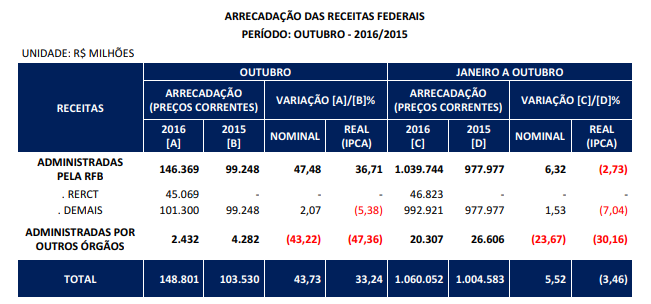

Outras receitas administradas pela RFB (R\\$ 24.069 milhões/905,58\%): resultado explicado pelo recolhimento, em outubro/16, de aproximadamente <b>R$ 22,5 bilhões</b>, a título de recolhimento de multa do regime especial de regularização cambial e tributária – RERCT;

IRPJ (R\\$ 34.744 milhões/+174,91\%): esse resultado deveu-se, basicamente ao recolhimento, em outubro, de <b>R\\$ 22,5 bilhões</b>, a título de IRPJ, relativo ao RERCT. 


Retrocedendo a 2013, verifica-se um pico no mês de novembro/2013. 

Segundo o relatório de análise da arrecadação mensal RFB:
https://receita.economia.gov.br/dados/receitadata/arrecadacao/relatorios-do-resultado-da-arrecadacao/arrecadacao-2013/novembro2013/analise-mensal-nov13.pdf

A arrecadação das Receitas Administradas pela RFB apresentou, no mês de novembro de 2013, variação real (IPCA) de +27,60\% em relação ao mesmo mês do ano anterior. O resultado é explicado, principalmente, pela adesão de contribuintes aos parcelamentos instituídos pela Lei 12.865/13, e consequente pagamento, conforme quadro a seguir. 

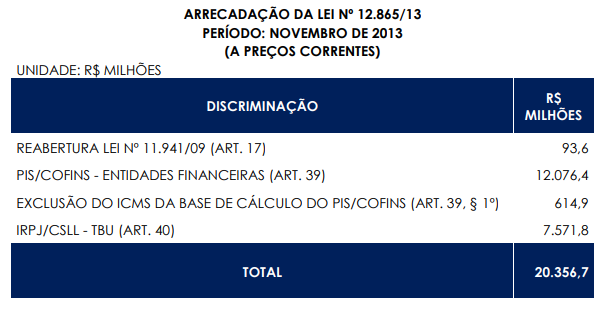

Nota-se que o pico na primeira diferença está em grande parte explicado pelo recolhimento atípico de 20,4 bilhões


In [19]:
# Ajuste dos outliers, expurgando as arrecadações atípicas
def ajuste_outlier(data, coluna, ajuste):
    print(f'Valor original em {data}: {df.loc[data][coluna]:.2f}')
    df_ajustado.loc[data, coluna] = (df.loc[data][coluna] - ajuste)
    print(f'Valor ajustado em {data}: {df_ajustado.loc[data][coluna]:.2f}')   

In [20]:
df_ajustado = df.copy()

# Ajuste da arrecadação atípica em out/2016 (outlier)
ajuste_outlier('2016-10-01', 'arrecadacao', 45609)

print()

# Ajuste da arrecadação atípica em nov/2013 (outlier)
ajuste_outlier('2013-11-01', 'arrecadacao', 20357)


Valor original em 2016-10-01: 116084.25
Valor ajustado em 2016-10-01: 70475.25

Valor original em 2013-11-01: 82983.56
Valor ajustado em 2013-11-01: 62626.56


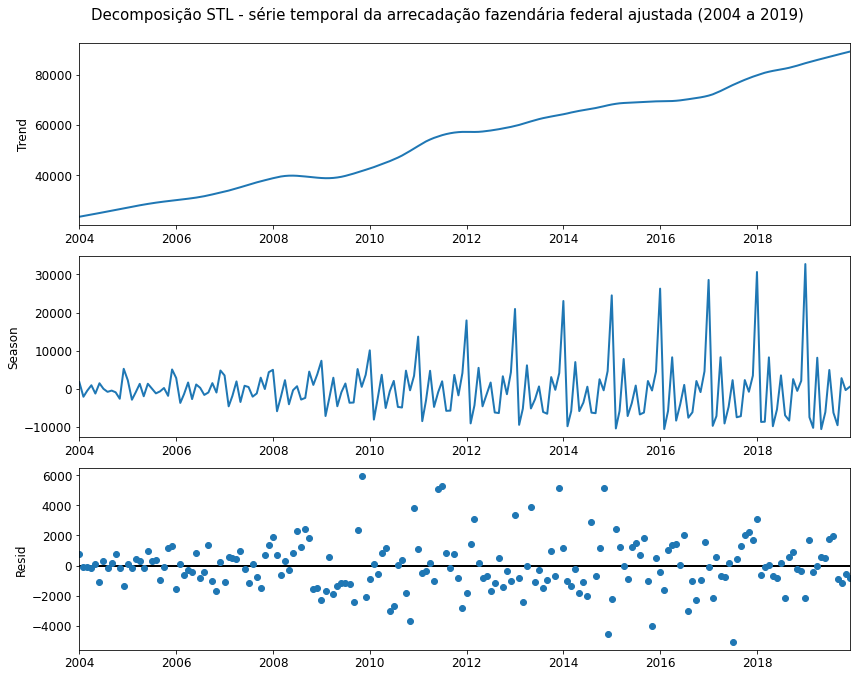

In [21]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_ajustado['arrecadacao'])
res = stl.fit()

plt.rcParams['figure.figsize'] = (12, 9)
fig = res.plot(observed=False, )
fig.suptitle('        Decomposição STL - série temporal da arrecadação fazendária federal ajustada (2004 a 2019)', 
             fontsize=15, y=1.04);

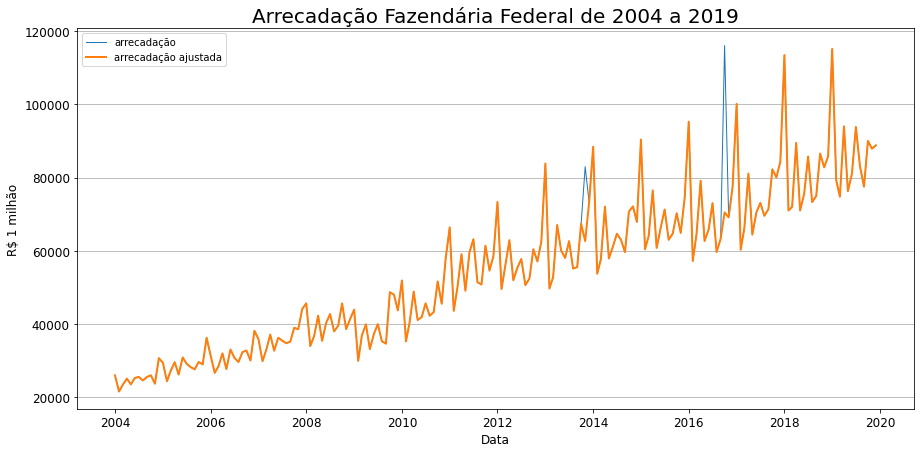

In [22]:
# Traça o gráfico
plt.rcParams['figure.figsize'] = (15, 7)
fig, ax = plt.subplots()
plt.plot(df['arrecadacao'], label = 'arrecadação', linewidth=1)
plt.plot(df_ajustado['arrecadacao'], label = 'arrecadação ajustada')
plt.legend()
ax.set_xlabel('Data')
ax.set_ylabel('R$ 1 milhão')
ax.set_title('Arrecadação Fazendária Federal de 2004 a 2019')
ax.grid(True, axis='y')
plt.show();

## Teste de Estacionariedade

In [23]:
#Para varificar a estacionariedade da série, vamos usar o teste ADF - ‘Augmented Dickey-Fuller Test’
from statsmodels.tsa.stattools import adfuller

# Função para realizar o teste ADF e introduzir labels aos resultados
def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(f'{label} : {value:.4f}')
    if result[1] <= 0.05:
        print('''Forte evidência para rejeitar a hipótese nula (Ho)
        Indicativo de que a série é estacionária.''')
    else:
        print('''Não é possível rejeitar a hipótese nula (Ho):
        Existe pelo menos uma raiz unitária, indicando série NÃO estacionária.''')

# Teste ADF sobre a série temporal da arrecadação
adfuller_test(df_ajustado['arrecadacao'])

ADF Test Statistic : 0.0929
p-value : 0.9656
Não é possível rejeitar a hipótese nula (Ho):
        Existe pelo menos uma raiz unitária, indicando série NÃO estacionária.


In [24]:
# Calcula a diferença de 1 período
df_ajustado['arrecadacao_d1']=df_ajustado['arrecadacao'].diff(periods=1)

df_ajustado[['arrecadacao', 'arrecadacao_d1']].head()

,arrecadacao,arrecadacao_d1
data,,
2004-01-01,25927.01,NaN
2004-02-01,21519.05,-4407.95
2004-03-01,23391.92,1872.87
2004-04-01,25041.10,1649.17
2004-05-01,23455.60,-1585.50


In [25]:
# Vamos testar agora sobre a primeira diferenca

adfuller_test(df_ajustado['arrecadacao_d1'].dropna())

ADF Test Statistic : -3.8568
p-value : 0.0024
Forte evidência para rejeitar a hipótese nula (Ho)
        Indicativo de que a série é estacionária.


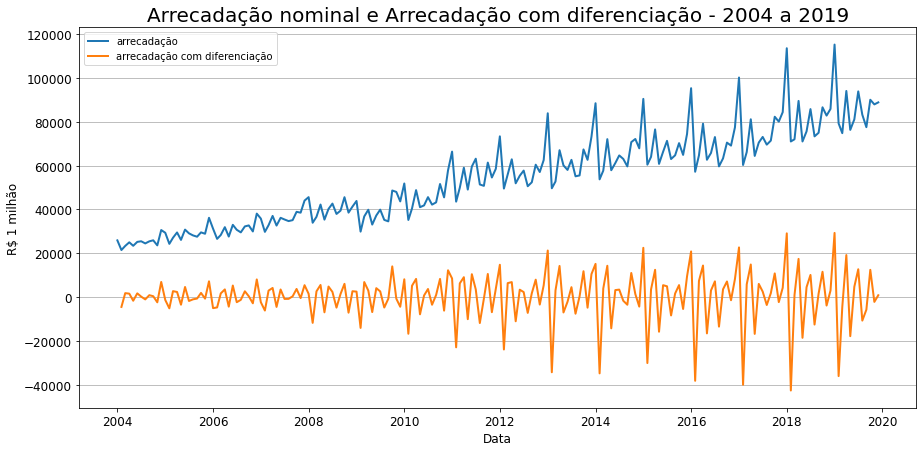

In [26]:
# Plot da arrecadação total e primeira_diferença

# Traça o gráfico
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(df_ajustado['arrecadacao'], label = 'arrecadação')#, linewidth=1)
plt.plot(df_ajustado['arrecadacao_d1'], label = 'arrecadação com diferenciação')
plt.legend()
ax.set_xlabel('Data')
ax.set_ylabel('R$ 1 milhão')
ax.set_title('Arrecadação nominal e Arrecadação com diferenciação - 2004 a 2019')
ax.grid(True, axis='y')
plt.show();

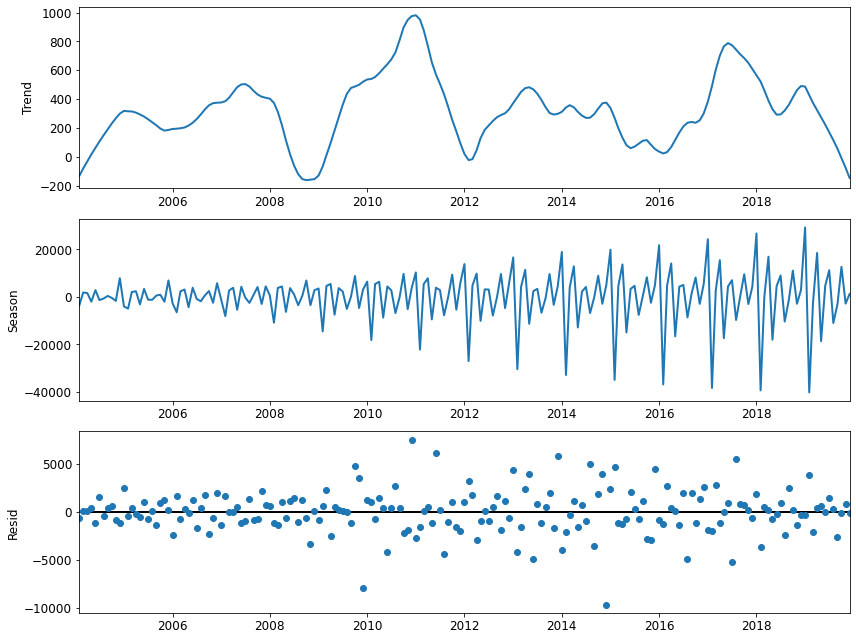

In [27]:
# Realiza nova decomposição sobre a primeira diferença

from statsmodels.tsa.seasonal import STL

stl = STL(df_ajustado['arrecadacao_d1'].dropna())
res = stl.fit()

plt.rcParams['figure.figsize'] = (12, 9)
fig = res.plot(observed=False)

In [28]:
# Exporta o resultado da arrecadação ajustada para um arquivo CSV

# Não será armazenada a coluna arrecadacao_d1
df_ajustado.drop('arrecadacao_d1', axis=1).to_csv(pasta+'arrecadacao_Brasil_ajustada.csv')

## Estudo da sazonalidade

In [29]:
df_ajustado['ano'] = df_ajustado.index.year
df_ajustado['mes'] = df_ajustado.index.month
df_pivot = df_ajustado.pivot('mes', 'ano', 'arrecadacao')


In [30]:
df_pivot

ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
mes,,,,,,,,,,,,,,,,
1,25927.01,29382.55,31256.47,35858.85,45624.47,43883.52,51861.18,66384.66,73332.10,83846.11,88417.49,90401.57,95278.45,100148.01,113487.90,115156.06
2,21519.05,24335.46,26614.68,29803.63,33957.48,29907.37,35224.23,43568.55,49528.06,49664.42,53731.28,60416.77,57208.30,60271.21,70991.13,79227.86
3,23391.92,27122.00,28375.15,32837.19,36649.15,36835.70,40469.61,49903.99,55966.61,52759.24,57702.61,63983.50,64651.41,66180.97,71996.08,74780.34
4,25041.10,29532.02,31946.49,37070.78,42248.43,39888.16,48831.03,59050.55,62874.47,67024.28,72051.13,76487.84,79122.10,81104.88,89475.14,94012.35
5,23455.60,26141.27,27658.83,32668.39,35375.02,33123.41,41050.63,49064.17,51931.71,60090.31,57892.03,60779.48,62658.41,64408.96,70993.25,76280.09
6,25232.81,30823.35,33006.26,36206.86,40251.08,37263.02,41863.98,59579.51,55372.96,58030.33,61154.14,66283.92,65766.05,70492.99,75584.60,81062.52
7,25512.06,29127.11,30745.16,35441.91,42685.07,39932.42,45624.34,63143.85,57733.14,62626.54,64639.89,71280.95,73016.94,73068.61,85761.28,93835.85
8,24534.42,28179.57,29571.88,34713.43,37962.92,35249.83,42213.89,51400.03,50602.68,55125.33,63036.38,62987.28,59639.22,69546.52,73320.79,83194.34
9,25484.46,27590.97,32291.08,35145.90,39487.71,34593.84,43245.43,50767.87,52393.57,55517.59,59626.56,64699.19,63282.33,71386.21,74954.67,77513.17


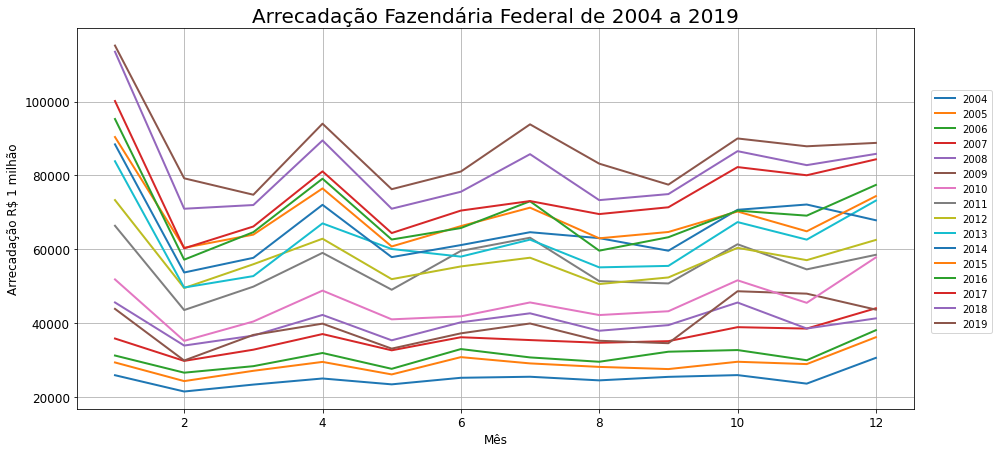

In [31]:
# Verificar comportamento sazonal de cada ano
plt.rcParams['figure.figsize'] = (15, 7)

fig, ax = plt.subplots()
plt.plot(df_pivot)
plt.legend(df_pivot.columns, loc=(1.02,0.2))
plt.xlabel('Mês')
plt.ylabel('Arrecadação R$ 1 milhão')
ax.set_title('Arrecadação Fazendária Federal de 2004 a 2019')
ax.grid(True, axis='both')
plt.show();


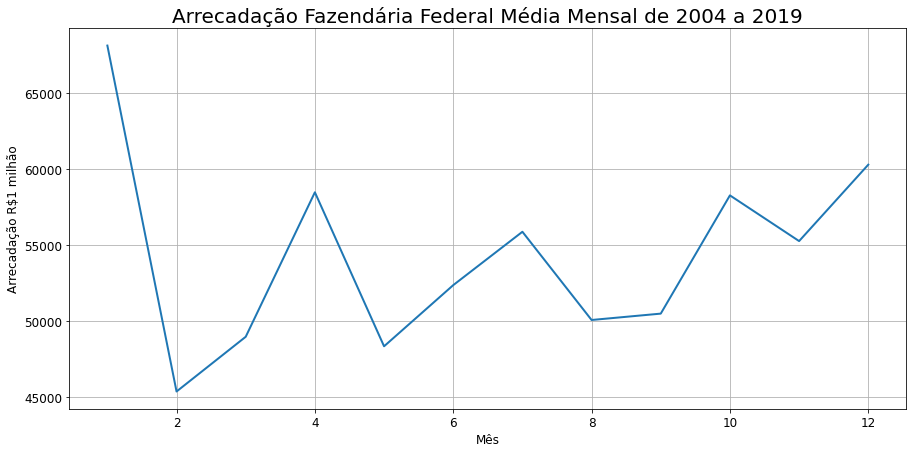

In [32]:
# Verificar comportamento sazonal usando a média da arrecadação em cada mês, ao longo dos anos
fig, ax = plt.subplots()
plt.plot(df_pivot.mean(axis=1))
plt.xlabel('Mês')
plt.ylabel('Arrecadação R$1 milhão')
ax.set_title('Arrecadação Fazendária Federal Média Mensal de 2004 a 2019')
ax.grid(True, axis='both')
plt.show();


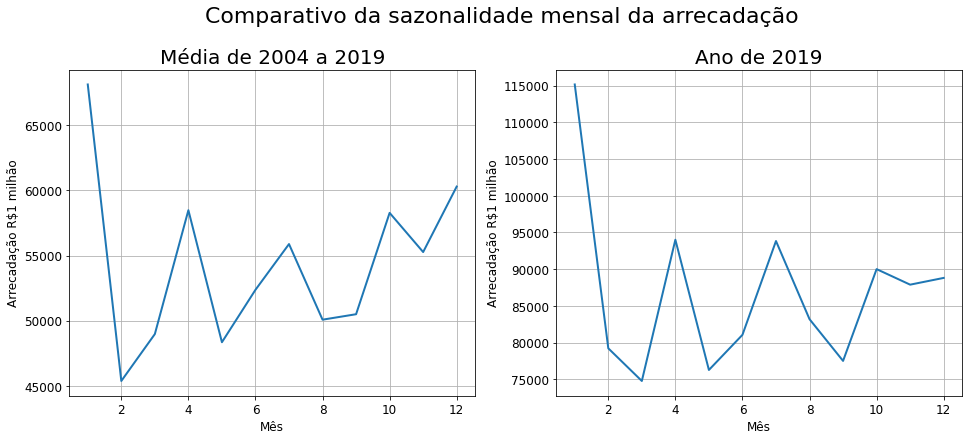

In [33]:
# Observa-se que a média parece muito com o comportamento de um ano isoladamente

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['figure.titlesize'] = 22

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Comparativo da sazonalidade mensal da arrecadação', va='bottom')
ax1.plot(df_pivot.mean(axis=1))
ax2.plot(df_pivot[2019], label='2019')

ax1.set_xlabel('Mês')
ax1.set_ylabel('Arrecadação R$1 milhão')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Arrecadação R$1 milhão')

ax1.set_title('Média de 2004 a 2019')
ax2.set_title('Ano de 2019')

ax1.grid(True, axis='both')
ax2.grid(True, axis='both')
